In [2]:
#Importación de librerías 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Modelo deterministico
# Presupuesto base (valores puntuales)
labor = 100000
materials = 120000
equipment = 50000

total_deterministic = labor + materials + equipment

print("Costo determinístico total:", total_deterministic)

Costo determinístico total: 270000


In [8]:
#Definición de distribuciones
n = 5000  # Número de iteraciones

# Mano de obra → Triangular
labor_dist = np.random.triangular(80000, 100000, 130000, n)

# Materiales → Normal
materials_dist = np.random.normal(120000, 20000, n)

# Equipos → Uniforme
equipment_dist = np.random.uniform(40000, 60000, n)

In [9]:
#Simulación por iteraciones
total_simulated = labor_dist + materials_dist + equipment_dist

mean_cost = np.mean(total_simulated)
median_cost = np.median(total_simulated)
p80 = np.percentile(total_simulated, 80)
p90 = np.percentile(total_simulated, 90)

print("Costo esperado (media):", mean_cost)
print("Costo mediano:", median_cost)
print("P80:", p80)
print("P90:", p90)

Costo esperado (media): 272867.95452259376
Costo mediano: 272319.1674248255
P80: 292218.942870975
P90: 302551.41537366365


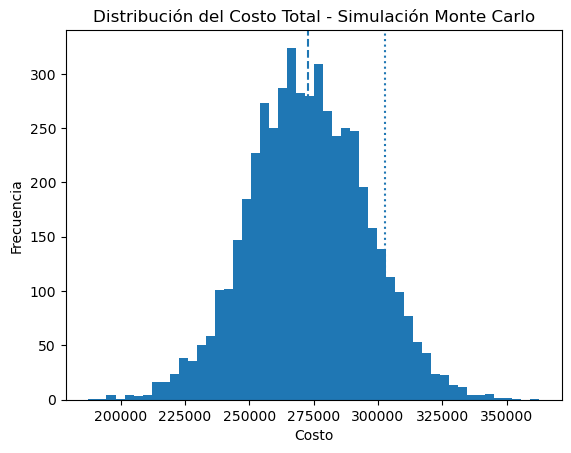

In [10]:
#Visualización básica
plt.figure()
plt.hist(total_simulated, bins=50)
plt.axvline(mean_cost, linestyle='dashed')
plt.axvline(p90, linestyle='dotted')
plt.title("Distribución del Costo Total - Simulación Monte Carlo")
plt.xlabel("Costo")
plt.ylabel("Frecuencia")
plt.show()

In [11]:
#Análisis de sensibilidad
corr_labor = np.corrcoef(labor_dist, total_simulated)[0,1]
corr_materials = np.corrcoef(materials_dist, total_simulated)[0,1]
corr_equipment = np.corrcoef(equipment_dist, total_simulated)[0,1]

print("Correlación Mano de Obra:", corr_labor)
print("Correlación Materiales:", corr_materials)
print("Correlación Equipos:", corr_equipment)

Correlación Mano de Obra: 0.4277508506973501
Correlación Materiales: 0.8659987253465642
Correlación Equipos: 0.255476409168608


In [12]:
#Cambio de distribución
labor_normal = np.random.normal(100000, 15000, n)

total_alt = labor_normal + materials_dist + equipment_dist

mean_alt = np.mean(total_alt)
p90_alt = np.percentile(total_alt, 90)

print("Nueva media:", mean_alt)
print("Nuevo P90:", p90_alt)

Nueva media: 269844.4341586977
Nuevo P90: 302576.8093369662


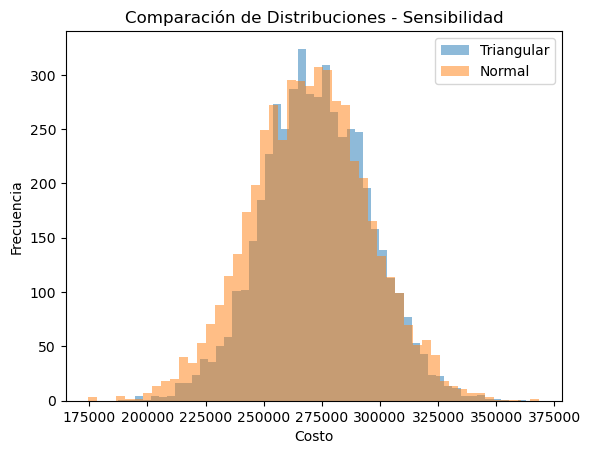

In [13]:
#Visualización
plt.figure()
plt.hist(total_simulated, bins=50, alpha=0.5, label="Triangular")
plt.hist(total_alt, bins=50, alpha=0.5, label="Normal")
plt.legend()
plt.title("Comparación de Distribuciones - Sensibilidad")
plt.xlabel("Costo")
plt.ylabel("Frecuencia")
plt.show()

In [18]:
print("===== CONCLUSIONES PRINCIPALES =====\n")

# Comparación determinístico vs simulación
print(f"Costo determinístico: ${total_deterministic:,.0f}")
print(f"Costo esperado (media simulada): ${mean_cost:,.0f}")

if mean_cost > total_deterministic:
    print("→ El modelo determinístico subestima el costo real.\n")
else:
    print("→ El modelo determinístico es conservador.\n")

# Riesgo (P90)
print(f"P90: ${p90:,.0f}")
print(f"Reserva recomendada (P90 - determinístico): ${p90 - total_deterministic:,.0f}\n")

# Variable más influyente
impactos = {
    "Labor": corr_labor,
    "Materials": corr_materials,
    "Equipment": corr_equipment
}

variable_critica = max(impactos, key=impactos.get)

print(f"Variable con mayor impacto en el costo: {variable_critica}")
print("→ Debe ser la principal prioridad de control.\n")

# Sensibilidad (cambio de distribución)
print(f"Nueva media: ${mean_alt:,.0f}")
print(f"Nuevo P90: ${p90_alt:,.0f}")
print("\nEl modelo muestra estabilidad ante el cambio de distribución.")
print("=====================================")

===== CONCLUSIONES PRINCIPALES =====

Costo determinístico: $270,000
Costo esperado (media simulada): $272,868
→ El modelo determinístico subestima el costo real.

P90: $302,551
Reserva recomendada (P90 - determinístico): $32,551

Variable con mayor impacto en el costo: Materials
→ Debe ser la principal prioridad de control.

Nueva media: $269,844
Nuevo P90: $302,577

El modelo muestra estabilidad ante el cambio de distribución.
